# MC866 Project 1

## PART I - Clustering Methods

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## Clustering using Expectation–Maximization (EM) Gaussian Mixture Model (GMM)

In [467]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [468]:
class GMM:
    def __init__(self, data, n_clusters=3, random_state=None):
        self.n_clusters = n_clusters
        self.data = data
        self.rand = np.random.RandomState(random_state)
        self.means = []
        self.covs = []
        cluster = np.array_split(self.rand.permutation(self.data), self.n_clusters)
        for c in cluster:
            self.means = np.append(self.means, np.mean(c, axis=0))
            self.covs = np.append(self.covs, np.cov(c.T))
        self.means = self.means.reshape(self.n_clusters, self.data.shape[1])
        self.covs = self.covs.reshape(self.n_clusters, self.data.shape[1], self.data.shape[1])
        
    def __probabilities_by_cluster(self, data=None):
        if data is None:
            data = self.data

        probabilities = np.array([])
        for i in range(0, self.n_clusters):
            var = multivariate_normal(mean=self.means[i], cov=self.covs[i], allow_singular=True)
            probabilities = np.append(probabilities, np.array([var.pdf(d) for d in data]))
        
        probabilities = probabilities.reshape((self.n_clusters, len(data)))
        return probabilities.T

    def aic(self):
        probabilities = self.__probabilities_by_cluster()
        probabilities = np.max(probabilities, axis=1) # get only the max probability for each data point
        score = np.log(probabilities).sum()
        return -2*score + 2*self.n_clusters

    def bic(self):
        probabilities = self.__probabilities_by_cluster()
        probabilities = np.max(probabilities, axis=1) # get only the max probability for each data point
        score = np.log(probabilities).sum()
        return -2*score + self.n_clusters*math.log(self.data.shape[0]) 

    def clusters(self, data=None):
        probabilities = self.__probabilities_by_cluster(data=data)
        return np.argmax(probabilities, axis=1) 

    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, self.n_clusters):
                data_filter = clusters == i
                filtered_data = self.data[data_filter] # only data that belongs to the cluster
                if len(filtered_data) > 1: # can't calculate cov matrix for only one data point
                    mean = np.sum(filtered_data, axis=0)
                    mean = mean/filtered_data.shape[0]
                    cov = np.cov(filtered_data.T)
                    for j in range (0, mean.shape[0]):
                        if self.means[i][j] != mean[j]:
                            changed = True
                            self.means[i][j] = mean[j]
                            self.covs[i] = cov
                        
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))

### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [469]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

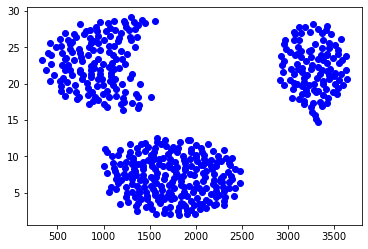

In [470]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [471]:
gmm = GMM(data=df_train.to_numpy(), n_clusters=3)

The clusters are initialy initialized with random points of the dataset provided for training.

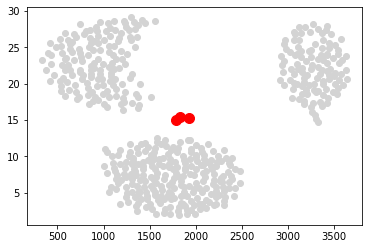

In [472]:
# initialize clusters and show their initial position in the chart    
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

We use the clusters() method to get which cluster each data point has the highest probability of belonging

In [473]:
gmm.clusters()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Initially without any fitting, the clusters provided are the following

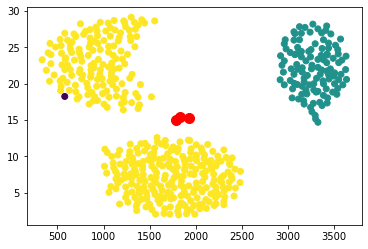

In [474]:
# initialize clusters and show their initial position in the chart

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

In [475]:
gmm.fit()

converged in 22 iterations
--- 0.8639388084411621 seconds ---


### Results after fitting with the raw training data

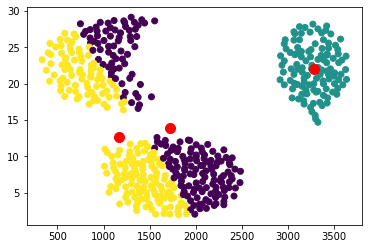

In [476]:
# Result of clusters after fitting is done

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

As we can see, despite the fact that X and Y are on different scales, the GMM algorithm converged to optimal clusters even without a prior data normalization (unlike k-means)

## Checking the test data distribution

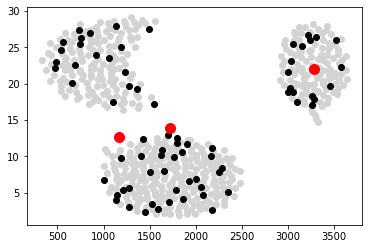

In [477]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

## How the test data was classified using the prefitted gaussian mixture model

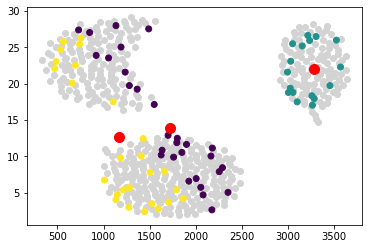

In [478]:
c = gmm.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

### Metrics

Now we will verify the results using a few metrics.

### The AIC/BIC Method
We'll run the GMM algorithm with different amounts of clusters and calculate the AIC and BIC metrics for every run, where:

AIC = -2*ln(L)+ p*ln(N)  
BIC = 2*p - 2*ln(L)

The actual value of these two metrics doesn't mean anything, we're only concerned with the diference between the two (We want the number of cluster that minimizes the diference between these metrics).

converged in 2 iterations
--- 0.047332048416137695 seconds ---
converged in 20 iterations
--- 0.5766561031341553 seconds ---
converged in 13 iterations
--- 0.4930732250213623 seconds ---
converged in 8 iterations
--- 0.3910360336303711 seconds ---
converged in 20 iterations
--- 1.4426820278167725 seconds ---
converged in 21 iterations
--- 1.5722429752349854 seconds ---
converged in 22 iterations
--- 1.928955078125 seconds ---
converged in 41 iterations
--- 4.539876937866211 seconds ---
converged in 13 iterations
--- 1.6751110553741455 seconds ---


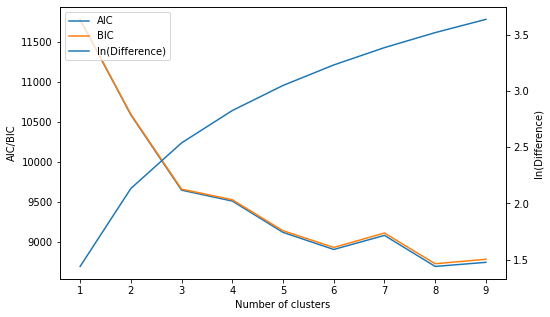

In [479]:
aic_values = []
bic_values = []
cluster_range = range(1, 10)
for i in cluster_range:
    gmm = GMM(data=df_train.to_numpy(), n_clusters=i)
    gmm.fit()
    aic_values.append(gmm.aic())
    bic_values.append(gmm.bic())

fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()

ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
ax2.set_ylabel("ln(Difference)")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
p3, = ax2.plot(cluster_range, np.log(np.subtract(bic_values, aic_values)), label="ln(Difference)") # the data
plt.legend(handles=[p1, p2, p3])
plt.show()

We can verify that the difference between the AIC and BIC methods starts to increase for n_clusters > 3 (more easily verified by the natural logarithm of the difference between AIC and BIC), so we can assume that 3 is the optimal number of clusters.

## Second problem
Now we'll tackle a problem with many more dimensions using clustering algorithms. As a proposed problem we'll attempt to solve the handwritten digits dataset using only unsupervised clustering.

We are using the skelearn digits dataset because it's an already scalled down version of the MNIST dataset, where each image has only 64 features, greatly reducing the time required to fit the models.

Since there are 10 classes in the dataset (the ten digits), an intuitive value for n_clusters would be 10, but we will validate that value using the analysis that we showed previously.

First we'll fetch the *digits* dataset from scikit, and do normalizations

Features 64
[[0.     0.     0.     ... 0.3125 0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.75   ... 0.     0.     0.    ]
 ...
 [0.     0.     0.3125 ... 0.3125 0.     0.    ]
 [0.     0.     0.1875 ... 0.5    0.     0.    ]
 [0.     0.     0.0625 ... 0.3125 0.     0.    ]]


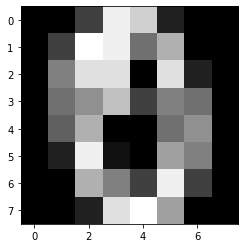

In [481]:
X, y = load_digits(return_X_y=True) # fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)
# since we know that the maximum value of a pixel in the dataset is 255, we'll just divide everything by 255 for scaling.
scalling_factor = np.max(X_train)
X_train = X_train / scalling_factor
X_test = X_test / scalling_factor
print("Features", X_train.shape[1])
print(X_test)

plt.imshow(X_train[2].reshape((8,8)), cmap='gray', vmin=0, vmax=1)
plt.show()

In [482]:
aic_values = []
bic_values = []
cluster_range = range(1, 10)
for i in cluster_range:
    gmm = GMM(data=X_train, n_clusters=i)
    gmm.init_clusters()
    gmm.fit()
    aic_values.append(gmm.aic())
    bic_values.append(gmm.bic())

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
plt.legend(handles=[p1, p2])
plt.show()

In [ ]:
aic_values = []
bic_values = []
cluster_range = range(1, 10)
train = df_train.to_numpy()
for i in cluster_range:
    gm = GaussianMixture(n_components=i).fit(train)
    aic_values.append(gm.aic(train))
    bic_values.append(gm.bic(train))

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
plt.legend(handles=[p1, p2])
plt.show()

In [483]:
n_clusters = 3
data = df_train.to_numpy()
points = np.random.RandomState(None).permutation(data)[:n_clusters]
means = []
covs = []
for p in points:
    means = np.append(means, p)
    covs = np.append(covs, np.cov(p))
means = means.reshape(n_clusters, 2)

probabilities = np.array([])
for i in range(0, n_clusters):
    var = multivariate_normal(mean=means[i], cov=covs[i], allow_singular=True)
    probabilities = np.append(probabilities, np.array([var.pdf(d) for d in data]))

probabilities = probabilities.reshape((n_clusters, len(data)))
probabilities = probabilities.T
print(data[0])
print(probabilities)

np.argmax(probabilities, axis=1)

[1555.     28.65]
[[1.82458804e-08 1.05752630e-07 6.32294803e-08]
 [1.75981200e-08 1.03971779e-07 6.12697559e-08]
 [1.74196792e-08 1.03344589e-07 6.06907569e-08]
 ...
 [2.51809107e-08 3.88917229e-08 4.76148949e-08]
 [2.52050135e-08 3.42869980e-08 4.47916950e-08]
 [2.51687254e-08 4.00334347e-08 4.82796178e-08]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,